<a href="https://colab.research.google.com/github/prakash4121/CE-888/blob/main/lab5/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [78]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] = data.target## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [79]:
#How many samples and features are there?

# YOUR CODE HERE
feat_len = len(df.columns) - 1
print('number of samples:', len(df), 'number of features:', feat_len)

number of samples: 178 number of features: 13


In [80]:
# Quiz Q1
# How many instances are there for each class? 
count0=0
count1=0
count2=0
for d in df['y']:
  if d==0:
    count0 = count0+ 1
  elif d==1:
    count1 += 1
  elif d==2:
    count2 += 1
print(count0,count1,count2)

# YOUR CODE HERE


59 71 48


In [81]:
from numpy.ma.core import std
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
for col in df.drop('y',axis=1):
  print('Feature: ',col, '= Median: \t',df[col].median(),'\t\tMean: \t',df[col].mean(),'\t\tStandard Deviation: \t',df[col].std())
  print('\n')


Feature:  alcohol = Median: 	 13.05 		Mean: 	 13.000617977528083 		Standard Deviation: 	 0.8118265380058577


Feature:  malic_acid = Median: 	 1.8650000000000002 		Mean: 	 2.336348314606741 		Standard Deviation: 	 1.1171460976144627


Feature:  ash = Median: 	 2.36 		Mean: 	 2.3665168539325854 		Standard Deviation: 	 0.2743440090608148


Feature:  alcalinity_of_ash = Median: 	 19.5 		Mean: 	 19.49494382022472 		Standard Deviation: 	 3.3395637671735052


Feature:  magnesium = Median: 	 98.0 		Mean: 	 99.74157303370787 		Standard Deviation: 	 14.282483515295668


Feature:  total_phenols = Median: 	 2.355 		Mean: 	 2.295112359550562 		Standard Deviation: 	 0.6258510488339891


Feature:  flavanoids = Median: 	 2.135 		Mean: 	 2.0292696629213474 		Standard Deviation: 	 0.9988586850169465


Feature:  nonflavanoid_phenols = Median: 	 0.34 		Mean: 	 0.36185393258426973 		Standard Deviation: 	 0.12445334029667939


Feature:  proanthocyanins = Median: 	 1.5550000000000002 		Mean: 	 1.59089887640

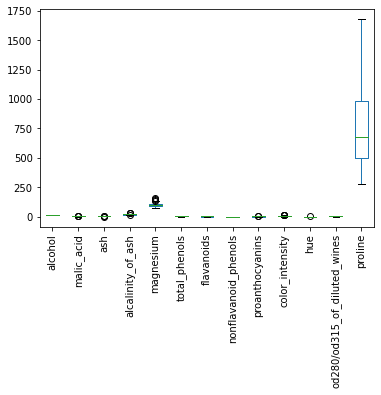

In [82]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?
df.boxplot(column = df.drop('y',axis=1).columns.tolist(),grid=False, rot=90)
# YOUR CODE HERE

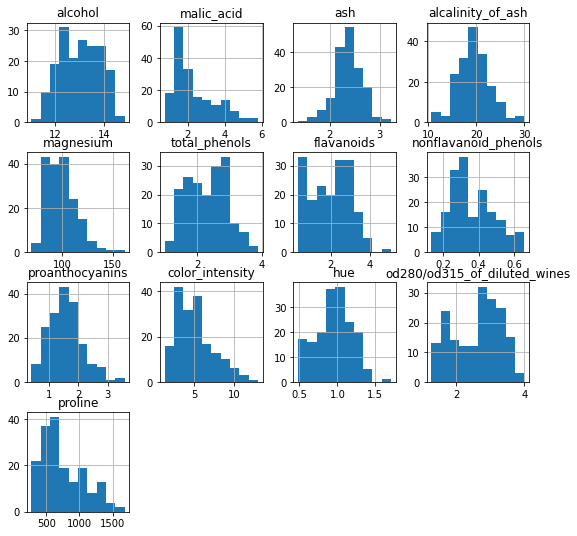

In [83]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features
hist=df.drop('y',axis=1).hist(figsize = (9, 9))


Let's do some multivariate analysis

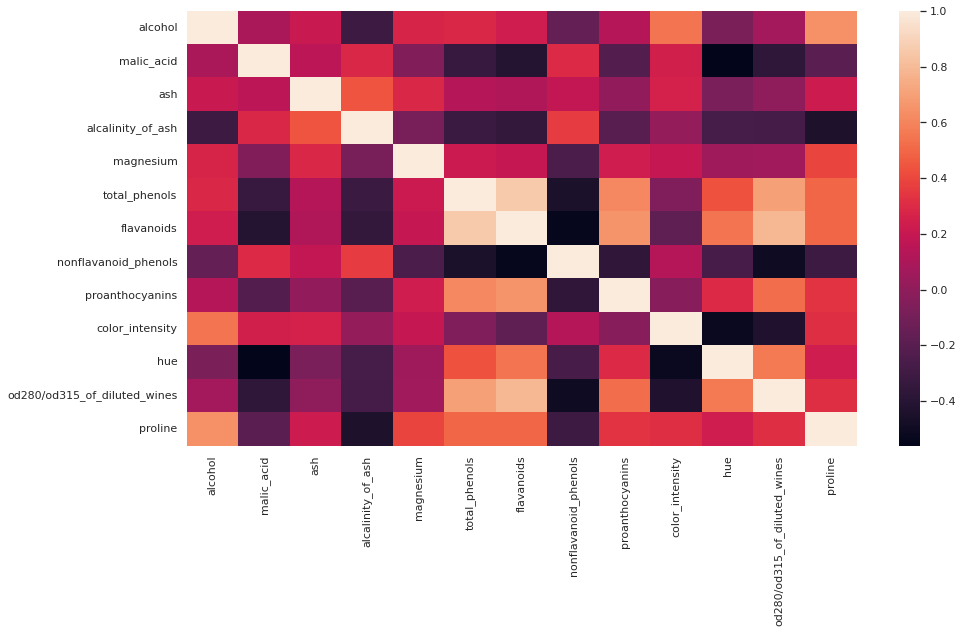

In [107]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
abc=df.drop('y',axis=1).corr()

# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)
sns.heatmap(abc, 
        xticklabels=abc.columns,
        yticklabels=abc.columns)
# YOUR CODE HERE

In [113]:
# What is the highest correlation between features?
shape = (50, 4460)

abc = np.random.normal(size=shape)

abc[:, 1000] += abc[:, 2000]

df = pd.DataFrame(abc)

c = df.abc().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

print abc[-4470:-4460]


SyntaxError: ignored

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE


In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!